In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [3]:
active_subjects = pd.read_csv(os.path.join("data", "active_subjects.csv"))
audiences = pd.read_csv(os.path.join("data", 'audiencies.csv'))
institutions = pd.read_csv(os.path.join("data", 'institutions.csv'))
passive_subjects = pd.read_csv(os.path.join("data", 'passive_subjects.csv'))

In [4]:
print(f"Se cuenta con el registro de las audiencias realizadas entre {audiences.anio.min()} y {audiences.anio.max()}.")

Se cuenta con el registro de las audiencias realizadas entre 2014 y 2024.


In [5]:
print(f"La plataforma disponibiliza registros de {len(institutions.id.unique())} instituciones.")
print(f"Se cuenta con registros de audiencias de {len(audiences.institucion_id.unique())} instituciones.")
print(f"El promedio de audiencias por institución es {audiences.groupby("institucion_id")["audiencia_id"].nunique().mean()}")

La plataforma disponibiliza registros de 984 instituciones.
Se cuenta con registros de audiencias de 237 instituciones.
El promedio de audiencias por institución es 713.2995780590717


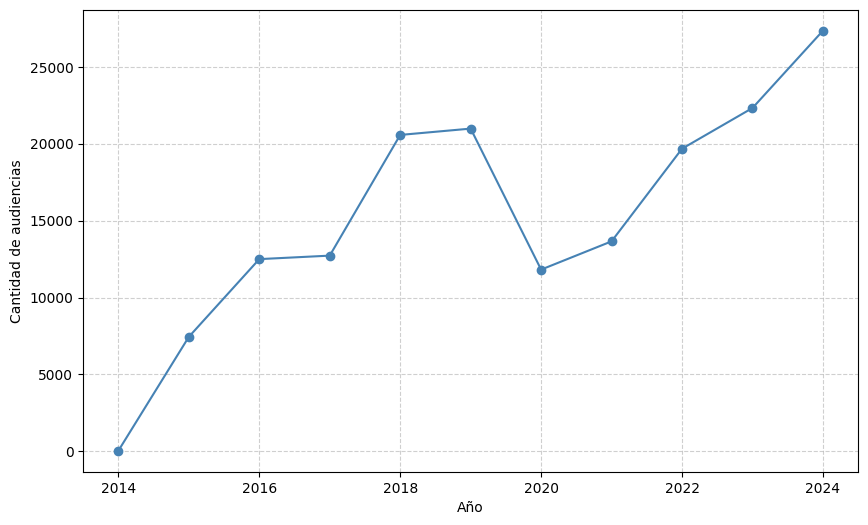

In [6]:
aud_por_anio = audiences["anio"].value_counts().sort_index()

# Gráfico de línea con puntos
plt.figure(figsize=(10,6))
plt.plot(aud_por_anio.index, aud_por_anio.values, marker="o", linestyle="-", color="steelblue")
plt.xlabel("Año")
plt.ylabel("Cantidad de audiencias")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [7]:
audiencias_count = audiences.groupby(["institucion_id", "sujeto_pasivo_id"])["audiencia_id"].nunique().reset_index(name="n_audiencias")

tabla = (
    audiencias_count
    .merge(institutions, left_on="institucion_id", right_on="id", how="left")
    .merge(passive_subjects, left_on="sujeto_pasivo_id", right_on="id", how="left",
           suffixes=("_inst", "_pasivo"))
)

top_cargos = tabla.sort_values("n_audiencias", ascending=False).head(5)[["name", "cargo", "n_audiencias"]]

bottom_cargos = tabla[tabla["n_audiencias"] > 0].sort_values("n_audiencias", ascending=True).head(5)[["name", "cargo", "n_audiencias"]]

print(f"El promedio de sujetos pasivos por institución es {audiencias_count["n_audiencias"].mean():.2f}, "
      f"con una dispersión (desviación estándar) de {audiencias_count["n_audiencias"].std():.2f}, la mediana {audiencias_count["n_audiencias"].median():.2f}.\n\n"
      f"Estos son los cargos con más audiencias:\n{top_cargos}\n\n"
      f"Y estos los cargos con menos audiencias:\n{bottom_cargos}")


El promedio de sujetos pasivos por institución es 17.12, con una dispersión (desviación estándar) de 36.98, la mediana 5.00.

Estos son los cargos con más audiencias:
                                             name  \
2842       Subsecretaría para las Fuerzas Armadas   
1004  Gobierno Regional Metropolitano de Santiago   
3252               Servicio de Impuestos Internos   
3264               Servicio de Impuestos Internos   
3276               Servicio de Impuestos Internos   

                                             cargo  n_audiencias  
2842           Jefa Departamento Asuntos Marítimos          1153  
1004                           Gobernador Regional           520  
3252            Director(a) Grandes Contribuyentes           496  
3264  Subdirector de Tecnologías de la Información           453  
3276               Director Grandes Contribuyentes           447  

Y estos los cargos con menos audiencias:
                                                   name  \
4937       

Usuarios únicos: 118761
Audiencias por usuario -> media: 2.879219609130944 mediana: 1.0 sd: 5.720150402783089

Instituciones únicas: 237
Audiencias por institución -> media: 713.2995780590717 mediana: 322.0 sd: 1066.4897111273503


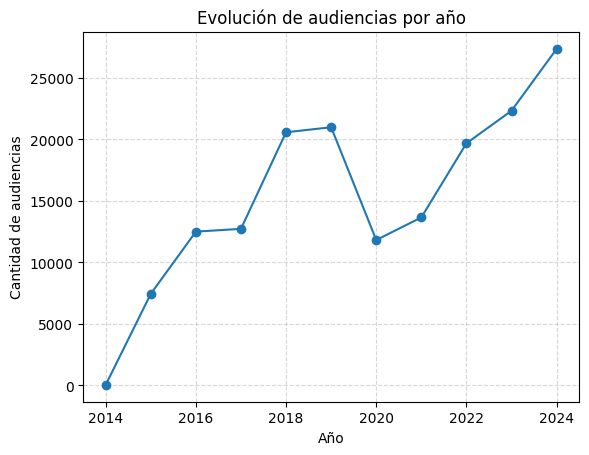

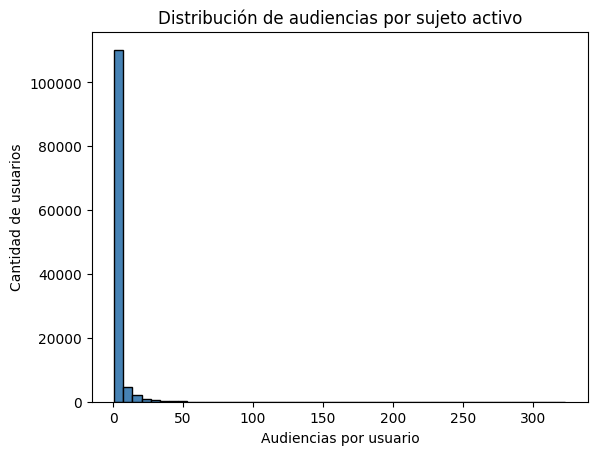

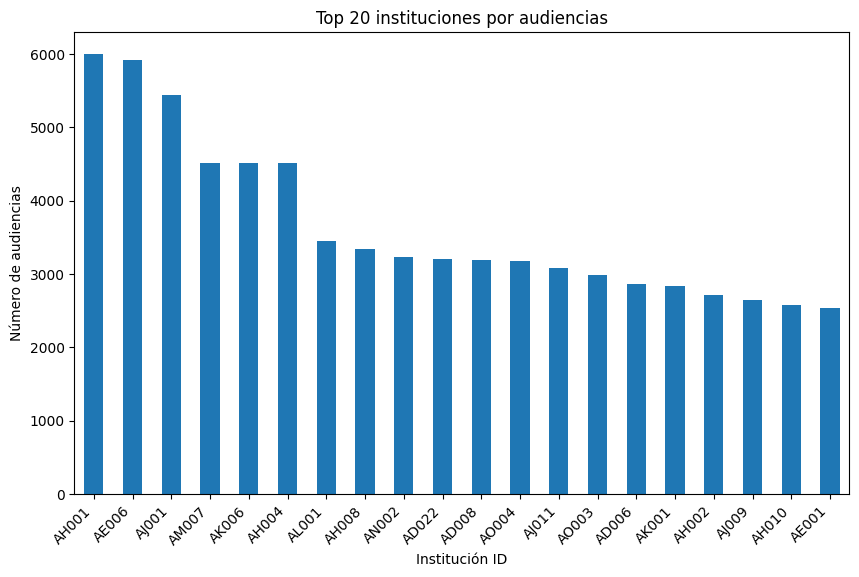

In [8]:
import matplotlib.pyplot as plt

# 1) Audiencias por sujeto activo (usuarios)
pairs = (
    active_subjects[["audiencia_id", "Nombre completo"]]
    .dropna()
    .assign(active_id=lambda d: d["Nombre completo"].str.strip().str.lower())
    [["audiencia_id", "active_id"]]
    .drop_duplicates()
)

deg_user = pairs.groupby("active_id")["audiencia_id"].nunique()

print("Usuarios únicos:", deg_user.index.nunique())
print("Audiencias por usuario -> media:", deg_user.mean(),
      "mediana:", deg_user.median(), "sd:", deg_user.std())

# 2) Audiencias por institución
aud_por_inst = audiences.groupby("institucion_id")["audiencia_id"].nunique()
print("\nInstituciones únicas:", aud_por_inst.index.nunique())
print("Audiencias por institución -> media:", aud_por_inst.mean(),
      "mediana:", aud_por_inst.median(), "sd:", aud_por_inst.std())

# 3) Evolución anual
aud_por_anio = audiences["anio"].value_counts().sort_index()
plt.plot(aud_por_anio.index, aud_por_anio.values, marker="o")
plt.title("Evolución de audiencias por año")
plt.xlabel("Año"); plt.ylabel("Cantidad de audiencias"); plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 4) Distribución de actividad de usuarios
plt.hist(deg_user.values, bins=50, color="steelblue", edgecolor="black")
plt.title("Distribución de audiencias por sujeto activo")
plt.xlabel("Audiencias por usuario"); plt.ylabel("Cantidad de usuarios")
plt.show()

# 5) Top 20 instituciones
aud_por_inst.sort_values(ascending=False).head(20).plot(kind="bar", figsize=(10,6))
plt.title("Top 20 instituciones por audiencias")
plt.xlabel("Institución ID"); plt.ylabel("Número de audiencias")
plt.xticks(rotation=45, ha="right")
plt.show()
